<a href="https://colab.research.google.com/github/satyam-thakur/Resources/blob/master/ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
company = pd.read_csv('1000_Companies.csv')
x = company.iloc[:,:-1].values
y = company.iloc[:,4].values

company.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

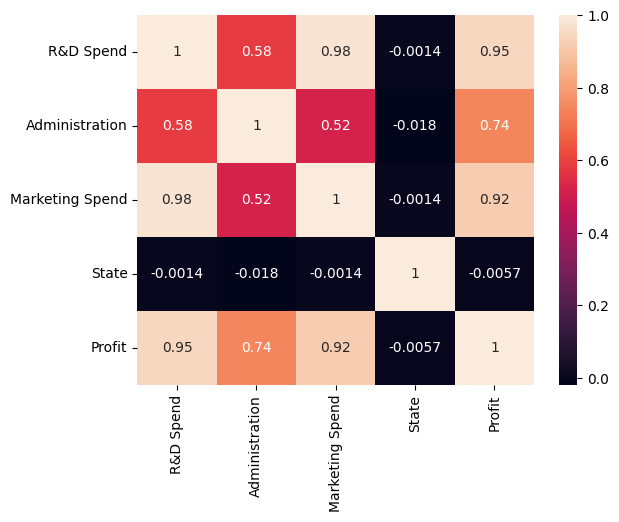

In [7]:
# Convert 'State' column to category codes before calculating correlation
company['State'] = company['State'].astype('category').cat.codes

# Calculate correlation only on numeric columns
sns.heatmap(company.corr(), annot=True)

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])

onehotencoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output
x = onehotencoder.fit_transform(x)
print(x[0])

[1. 0. 1. ... 0. 0. 1.]


In [41]:
x = x[:, 1:]
print(x)

[[1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 0. 1.]]


In [15]:
#Splitting the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
# Fitting multiple linear regression to the training sets
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [29]:
# Predicting the test set results
y_pred = regressor.predict(x_test)
print(y_pred)

[119409.66275733 119409.66275733 119409.66275733 118672.35707447
 117726.92423641 117726.92423641 117726.92423641 119409.66275733
 117726.92423641 118672.35707447 119409.66275733 118672.35707447
 119409.66275733 119409.66275733 119409.66275733 117726.92423641
 118672.35707447 119409.66275733 118672.35707447 117726.92423641
 117726.92423641 119409.66275733 118672.35707447 119409.66275733
 119409.66275733 119409.66275733 117726.92423641 117726.92423641
 119409.66275733 119409.66275733 118672.35707447 119409.66275733
 117726.92423641 118672.35707447 119409.66275733 119409.66275733
 117726.92423641 118672.35707447 118672.35707447 118672.35707447
 117726.92423641 119409.66275733 119409.66275733 118672.35707447
 118672.35707447 119409.66275733 118672.35707447 118672.35707447
 118672.35707447 118672.35707447 118672.35707447 118672.35707447
 119409.66275733 117726.92423641 179311.74666195 118672.35707447
 118672.35707447 117726.92423641 117726.92423641 117726.92423641
 118672.35707447 117726.9

In [31]:
# find coeffiecient
print(regressor.coef_)

[-28662.15478045  13289.24795799 -13289.24795799 ...     34.6878592
    438.02855983   -438.02855983]


In [37]:
# Calculate intercept
print(regressor.intercept_)

147265.1361365121


In [40]:
# find the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.003355163340493128

# K-Mean Clusturing

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

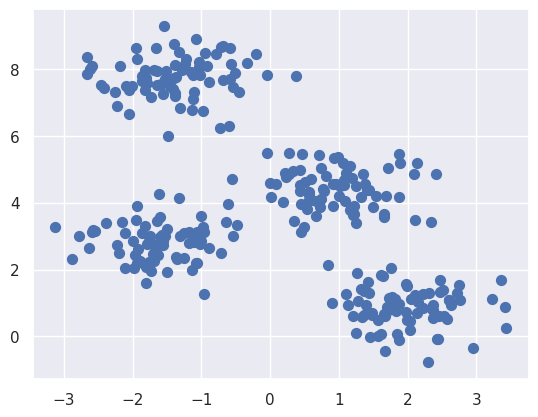

In [4]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(x[:,0], x[:,1], s=50)